# Results of Edge Detection Benchmark and Speedup

By: Annie Wilcox

## Serial Experiment

I compiled the serial code on the AMD20 development node of the HPCC using the following commands:

``` shell
make 
./process images/imagename.png -images/imagename_ouput.png 3 50
```

I ran the code 10 times for each image using the time command in order to obtain an average runtime and compare whether or not different images effect the time it takes for the process to run.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

In [2]:
data = [
    [0.206, 6.984, 0.281, 0.225],
    [0.208, 6.781, 0.265, 0.206],
    [0.204, 6.892, 0.265, 0.206],
    [0.205, 6.815, 0.263, 0.208],
    [0.204, 6.79, 0.265, 0.208],
    [0.204, 6.799, 0.264, 0.207],
    [0.206, 6.859, 0.265, 0.209],
    [0.205, 6.834, 0.264, 0.208],
    [0.205, 6.831, 0.264, 0.208],
    [0.205, 6.815, 0.264, 0.209]
]

columns = ["Cube", "Earth", "MSU Stadium", "Sparty"]
df = pd.DataFrame(data, columns = columns)
df

,Cube,Earth,MSU Stadium,Sparty
0,0.206,6.984,0.281,0.225
1,0.208,6.781,0.265,0.206
2,0.204,6.892,0.265,0.206
3,0.205,6.815,0.263,0.208
4,0.204,6.790,0.265,0.208
5,0.204,6.799,0.264,0.207
6,0.206,6.859,0.265,0.209
7,0.205,6.834,0.264,0.208
8,0.205,6.831,0.264,0.208
9,0.205,6.815,0.264,0.209


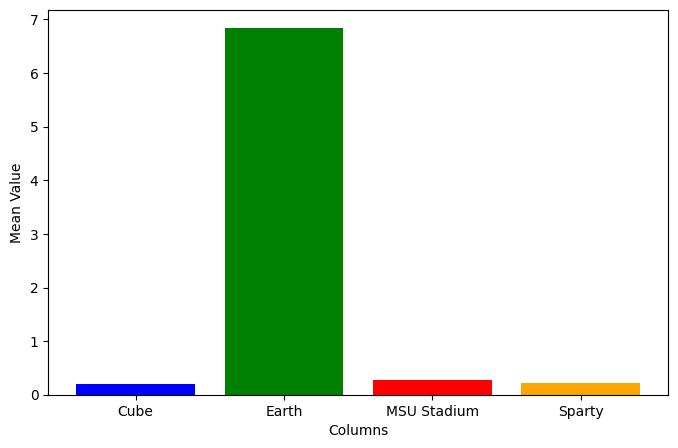

In [3]:
means = df.mean()

plt.figure(figsize=(8, 5))
plt.bar(means.index, means.values, color=['blue', 'green', 'red', 'orange'])


plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.show()

## Code Optimization

* ### Part 1: Compiler Optimization ###
Using a variety of compiler optimization flags, I ran a shorter timing test on only the Earth png (because it takes the longest time to run with the serial code) to determine which compiler optimization level speeds up the serial code the most.

using the -03 optimization flag resulted in the fastest average process runtime for the Earth png at 2.2532 seconds, which is already an approximate 67% decrease in runtime.

* ### Part 2: Reordering Loops ###
I re-ordered the loops in the process_img function and then ran the same test as the benchmarking portion of this homework assignment in order to compare my optimized serial code to the original serial code. I found that focusing mainly on the Average Filter loop produced the best results. The Earth image still takes the longest by far to run, but we can start to see some minor differences in the other images - MSUStadium png takes slightly longer than Cube or Sparty to run.

In [4]:
data2 = [
    [0.067, 2.211, 0.138, 0.091],
    [0.08, 1.980, 0.112, 0.074],
    [0.065, 1.977, 0.113, 0.073],
    [0.071, 1.978, 0.112, 0.073],
    [0.062, 2.207, 0.11, 0.075],
    [0.064, 1.985, 0.112, 0.081],
    [0.063, 1.983, 0.113, 0.074],
    [0.063, 1.979, 0.113, 0.075],
    [0.064, 1.98, 0.112, 0.075],
    [0.064, 2.189, 0.112, 0.073]
]
columns = ["Cube", "Earth", "MSU Stadium", "Sparty"]
df2 = pd.DataFrame(data2, columns = columns)
df2

,Cube,Earth,MSU Stadium,Sparty
0,0.067,2.211,0.138,0.091
1,0.080,1.980,0.112,0.074
2,0.065,1.977,0.113,0.073
3,0.071,1.978,0.112,0.073
4,0.062,2.207,0.110,0.075
5,0.064,1.985,0.112,0.081
6,0.063,1.983,0.113,0.074
7,0.063,1.979,0.113,0.075
8,0.064,1.980,0.112,0.075
9,0.064,2.189,0.112,0.073


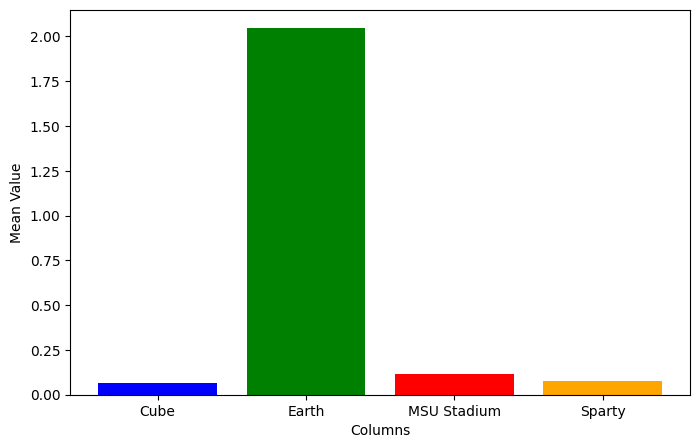

In [5]:
means = df2.mean()

plt.figure(figsize=(8, 5))
plt.bar(means.index, means.values, color=['blue', 'green', 'red', 'orange'])


plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.show()

## OpenMP Speedup
Using OpenMP scheduling options, I added a parallel region to each of the three (smoothing, gradient computation, and thresholding) snippets of code. For the average filter, I used the collapse command to tell OpenMP to treat the nested for loops as one loop. Then, I used the static scheduling option to break the contents of the loops into a chunk, which works nicely for optimization when the workload is fairly even. For the gradient filter, I used the dynamic scheduling option, as some threads may not complete their work at the same time as other threads. The dynamic scheduling option allows threads that finish before others to pick up more work so there are less halts in the process. For thresholding I used the guided scheduling option, as it allows threads to pick up chunks of increasingly larger size if they finish their workload quickly.

In [6]:
data3 = [
    [0.083, 2.024, 0.114, 0.076],
    [0.064, 2.22, 0.114, 0.074],
    [0.063, 2.055, 0.111, 0.073],
    [0.064, 2.007, 0.112, 0.073],
    [0.063, 2.222, 0.112, 0.073],
    [0.064, 2.003, 0.115, 0.074],
    [0.07, 2.004, 0.112, 0.075],
    [0.069, 2.01, .0112, 0.074],
    [0.064, 2.004, .0113, 0.075],
    [0.064, 1.998, 0.113, 0.072]
]
columns = ["Cube", "Earth", "MSU Stadium", "Sparty"]
df3 = pd.DataFrame(data3, columns = columns)
df3

,Cube,Earth,MSU Stadium,Sparty
0,0.083,2.024,0.1140,0.076
1,0.064,2.220,0.1140,0.074
2,0.063,2.055,0.1110,0.073
3,0.064,2.007,0.1120,0.073
4,0.063,2.222,0.1120,0.073
5,0.064,2.003,0.1150,0.074
6,0.070,2.004,0.1120,0.075
7,0.069,2.010,0.0112,0.074
8,0.064,2.004,0.0113,0.075
9,0.064,1.998,0.1130,0.072


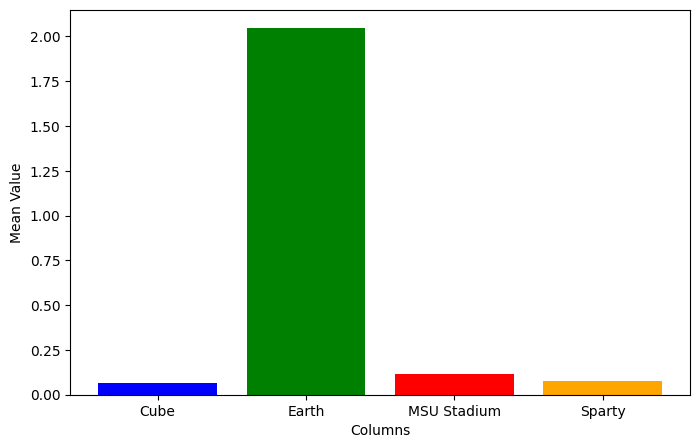

In [7]:
means = df2.mean()

plt.figure(figsize=(8, 5))
plt.bar(means.index, means.values, color=['blue', 'green', 'red', 'orange'])


plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.show()

## Concluding Discussion
This project is a fantastic example of how powerful optimization of code can be. My optimizations led to an approximate 65% increase in the efficiency of my code for all images. It is also an interesting exploration into how various optimization options interact with one another. I realized that on their own, OpenMP and the serial optimization options do approximately the same amount of work in terms of optimizing the code, however in conjunction they don't necessarily build on one another. I noticed that while the serial optimization options generally lead to an increase in efficiency (using various compiler flags), OpenMP parallel regions can occasionally lead to overhead, but they enforce more consistency in runtime than serial optimization. 

/tmp/local/51084173/ipykernel_2325008/1704703687.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(filename)


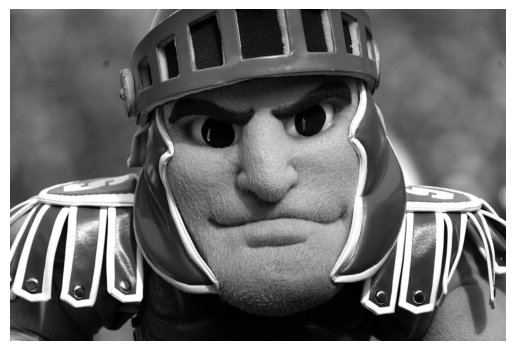

In [3]:
filename = 'images/sparty.png'

im = imageio.imread(filename)
    
#Show the image
plt.imshow(im, cmap='gray');
plt.axis('off');

Image of Sparty before (above) and after (below) processing.

----

/tmp/local/51084173/ipykernel_2325008/3193814927.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(filename)


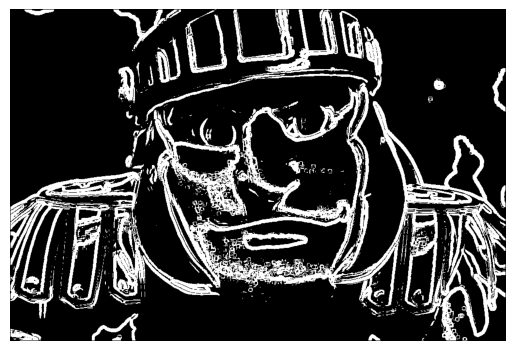

In [4]:
filename = 'images/output.png'

im = imageio.imread(filename)
    
#Show the image
plt.imshow(im, cmap='gray');
plt.axis('off');